In [1]:
import pandas as pd
import csv
import os
from array import array

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.colors import LogNorm

from ipywidgets import *
import numpy, scipy, scipy.optimize
import matplotlib
# from mpl_toolkits.mplot3d import  Axes3D                                                                                                                                          \
                                                                                                                                                                                     
from matplotlib import cm # to colormap 3D surfaces from blue to red                                                                                                                
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

In [2]:
df_hzd_theory = pd.read_csv("https://raw.githubusercontent.com/aminnj/scouting/master/theory/hzd/hzd.csv")
df_hzd_theory = df_hzd_theory[df_hzd_theory["mass"] % 100 == 0]
df_hzd_theory["mass"] /= 1e3
df_hzd_theory = df_hzd_theory.set_index("mass")
# ctau is now in mm
df_hzd_theory[df_hzd_theory.columns[df_hzd_theory.columns.str.contains("ctau_")]] *= 1e3

#print df_hzd_theory

def get_eps(mass, ctau):
    """
    Mass in GeV, ctau in mm.
    Returns epsilon.
    """
    row = df_hzd_theory.iloc[np.abs(df_hzd_theory.index - mass).argmin()]
    k = row["ctau_for_eps10em2"]
    eps = 1e-2*(k/ctau)**0.5
    return eps


def get_br(mass):
    row = df_hzd_theory.iloc[np.abs(df_hzd_theory.index - mass).argmin()]
    k = row["br_zdtosm"]
    br = k
    return br

In [3]:
get_eps(0.3, 133.723117) # should be 1-e6, yep
get_br(0.3) # should be 0.469274, yep

0.4692744825316794

In [7]:
df_limits = pd.read_csv("~/nobackup/Jupyter/hzd_BRbrUL_v2.csv")
#print df_limits['mass'].tolist()
df_limits = df_limits.set_index("mass")
def get_lim(mass, ctau):
    """
    Mass in GeV, ctau in mm.
    Returns limit.
    """
    
#     limits.iloc[32]
#     row = df_limits.iloc[np.abs(mass).argmin() - 1]
#     print row
    row = df_limits.iloc[np.abs(df_limits.index - mass).argmin()]
    #print np.abs(df_limits.index - mass).argmin()
   
    limit = row["ctau = " + str(ctau)]
    return limit

get_lim(2,100)

0.001843297060035717

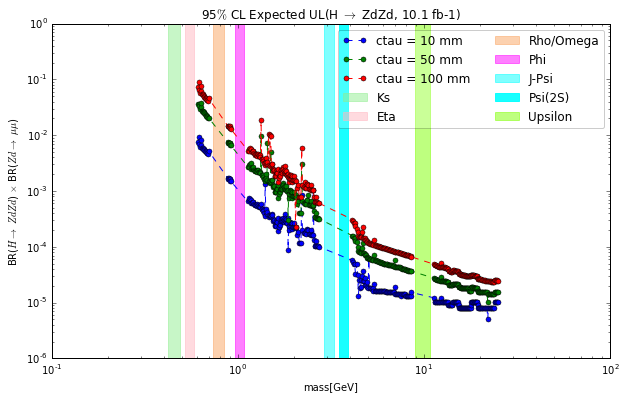

In [9]:
masses = [0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.0, 2.02, 2.04, 2.06, 2.08, 2.1, 2.14, 2.16, 2.18, 2.2, 2.22, 2.26, 2.28, 2.3, 2.32, 2.34, 2.36, 2.38, 2.42, 2.44, 2.46, 2.48, 2.5, 2.52, 2.54, 2.56, 2.58, 2.6, 2.62, 2.64, 2.66, 2.68, 2.7, 2.72, 4.12, 4.16, 4.2, 4.24, 4.28, 4.36, 4.4, 4.44, 4.48, 4.52, 4.56, 4.6, 4.64, 4.68, 4.72, 4.76, 4.8, 4.84, 4.88, 4.92, 4.96, 5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.06, 6.12, 6.18, 6.24, 6.3, 6.36, 6.42, 6.48, 6.54, 6.6, 6.66, 6.72, 6.78, 6.84, 6.9, 6.96, 7.0, 7.07, 7.14, 7.21, 7.28, 7.35, 7.42, 7.49, 7.56, 7.63, 7.7, 7.77, 7.84, 7.91, 7.98, 8.0, 8.08, 8.16, 8.24, 8.32, 8.4, 8.48, 8.56, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22.2, 22.4, 22.6, 22.8, 23.0, 23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24.4, 24.6, 24.8, 25.0]

#excluded 0.326,1.31,1.45,2.18,2.24,2.4,2.74,2.76,2.78,2.8,18.6

limits_ctau1 = []
limits_ctau5 = []
limits_ctau10 = []
limits_ctau50 = []
limits_ctau100 = []

for k in range(len(masses)):
    limits_ctau1.append(get_lim(masses[k],1))
    limits_ctau5.append(get_lim(masses[k],5))
    limits_ctau10.append(get_lim(masses[k],10))
    limits_ctau50.append(get_lim(masses[k],50))
    limits_ctau100.append(get_lim(masses[k],100))

# print limits_ctau1
# print limits_ctau10
# print limits_ctau100

from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})

#plt.plot(masses,limits_ctau1,linestyle='--', marker='o', label= 'ctau = 1 mm',markersize=5)
#plt.plot(masses,limits_ctau5,linestyle='--', marker='o', label= 'ctau = 5 mm',markersize=5)
plt.plot(masses,limits_ctau10,linestyle='--', marker='o', label= 'ctau = 10 mm',markersize=5)
plt.plot(masses,limits_ctau50,linestyle='--', marker='o', label= 'ctau = 50 mm',markersize=5)
plt.plot(masses,limits_ctau100,linestyle='--', marker='o', label= 'ctau = 100 mm',markersize=5)
                                                         
    
plt.axvspan(0.42, 0.49, alpha=0.5, color='lightgreen', label = "Ks")
plt.axvspan(0.52, 0.58, alpha=0.5, color='lightpink', label = "Eta")
plt.axvspan(0.73, 0.84, alpha=0.5, color='sandybrown', label = "Rho/Omega")
plt.axvspan(0.96, 1.08, alpha=0.5, color='magenta', label = "Phi")
plt.axvspan(2.91, 3.27, alpha=0.5, color='cyan', label = "J-Psi")
plt.axvspan(3.47, 3.89, alpha=0.9, color='cyan', label = "Psi(2S)")
plt.axvspan(8.99, 10.77, alpha=0.5, color='chartreuse', label = "Upsilon")


plt.xlabel('mass[GeV]')
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$) $\times$ BR($Zd \rightarrow$ $\mu\mu$)')
plt.yscale("log")
plt.xscale("log")
#plt.xlim(1.42,1.6)
plt.ylim(1e-6,1)
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")

plt.show()

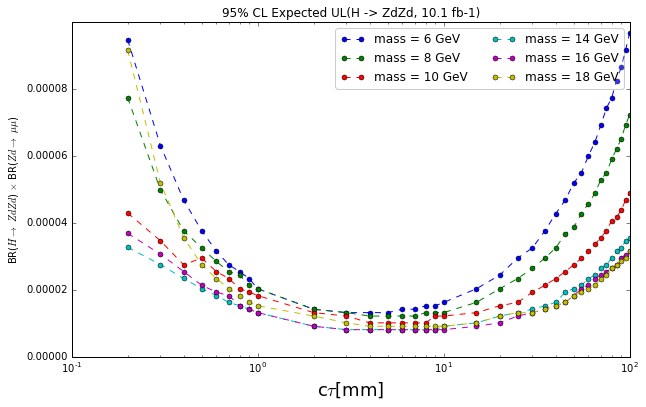

In [10]:

ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

limits_mass6 = []
limits_mass8 = []
limits_mass10 = []
limits_mass12 = []
limits_mass14 = []
limits_mass16 = []
limits_mass18 = []

for k in range(len(ctaus)):
    limits_mass6.append(get_lim(6,ctaus[k]))
    limits_mass8.append(get_lim(8,ctaus[k]))
    limits_mass10.append(get_lim(10,ctaus[k]))
    limits_mass12.append(get_lim(12,ctaus[k]))
    limits_mass14.append(get_lim(14,ctaus[k]))
    limits_mass16.append(get_lim(16,ctaus[k]))
    limits_mass18.append(get_lim(18,ctaus[k]))
    
    
#print limits_mass2p0    

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(10,6))
#plt.plot(ctaus,limits_mass1p25,linestyle='--', marker='o', label= 'mass = 1.25 GeV',markersize=5)
plt.plot(ctaus,limits_mass6,linestyle='--', marker='o', label= 'mass = 6 GeV',markersize=5)
plt.plot(ctaus,limits_mass8,linestyle='--', marker='o', label= 'mass = 8 GeV',markersize=5)
plt.plot(ctaus,limits_mass10,linestyle='--', marker='o', label= 'mass = 10 GeV',markersize=5)
#plt.plot(ctaus,limits_mass12,linestyle='--', marker='o', label= 'mass = 12 GeV',markersize=5)
plt.plot(ctaus,limits_mass14,linestyle='--', marker='o', label= 'mass = 14 GeV',markersize=5)
plt.plot(ctaus,limits_mass16,linestyle='--', marker='o', label= 'mass = 16 GeV',markersize=5)
plt.plot(ctaus,limits_mass18,linestyle='--', marker='o', label= 'mass = 18 GeV',markersize=5)

plt.xlabel(r'c$\tau$[mm]', fontsize = 18)
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$) $\times$ BR($Zd \rightarrow$ $\mu\mu$)')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
#plt.xlim(1e-7,2e-5)
plt.title("95% CL Expected UL(H -> ZdZd, 10.1 fb-1)")

plt.show()